In [1]:
import os
import sys; sys.path.append("~/HHbbgg_ETH/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)

Welcome to ROOTaaS 6.05/02


<module 'training_utils' from '/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/Training/python/training_utils.pyc'>

In [2]:
ntuples = '20170526'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "NonRes" in s]
diphotonJets = [s for s in files if "DiPhotonJets" in s]
gJets_lowPt = [s for s in files if "GJet_Pt-20to40" in s]
gJets_highPt = [s for s in files if "GJet_Pt-40" in s]

utils.IO.add_signal(ntuples,signal,1)
utils.IO.add_background(ntuples,diphotonJets,-1)
utils.IO.add_background(ntuples,gJets_lowPt,-2)
utils.IO.add_background(ntuples,gJets_highPt,-2)

for i in range(len(utils.IO.backgroundName)):        
    print "using background file n."+str(i)+": "+utils.IO.backgroundName[i]
for i in range(len(utils.IO.signalName)):    
    print "using signal file n."+str(i)+": "+utils.IO.signalName[i]

env: data=/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526
using background file n.0: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
using background file n.1: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/output_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
using background file n.2: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
using signal file n.0: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/AllNonResSig_20170526.root


In [3]:
#use noexpand for root expressions, it needs this file https://github.com/ibab/root_pandas/blob/master/root_pandas/readwrite.py
branch_names = 'leadingJet_bDis,subleadingJet_bDis,noexpand:fabs(CosThetaStar_CS),noexpand:fabs(CosTheta_bb),noexpand:fabs(CosTheta_gg),noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M(),noexpand:dijetCandidate.Pt()/diHiggsCandidate.M(),customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverMDecorr,DiJetDiPho_DR'.split(",")
#branch_names = 'leadingJet_bDis,subleadingJet_bDis,noexpand:fabs(CosThetaStar_CS),noexpand:fabs(CosTheta_bb),noexpand:fabs(CosTheta_gg),noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M(),noexpand:dijetCandidate.Pt()/diHiggsCandidate.M()'.split(",")
branch_names = [c.strip() for c in branch_names]
#branch_names = (b.replace(" ", "_") for b in branch_names)
#branch_names = list(b.replace("-", "_") for b in branch_names)
print branch_names

import pandas as pd
import root_pandas as rpd

#utils.IO.get_cross_sections('jsons/datasets80X_Moriond.json')
#utils.IO.w_sig.append(utils.IO.get_weight('signal','nrSM',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','DiPhoJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',1))


utils.preprocessing.set_signals_and_backgrounds("bbggSelectionTree",branch_names)
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=utils.preprocessing.set_variables(branch_names)

#relative weighting between components of one class is kept, all classes normalized to the same
#weights_sig=utils.preprocessing.weight_signal_with_resolution(weights_sig,y_sig)
weights_sig=utils.preprocessing.weight_signal_with_resolution(weights_sig,y_sig)
weights_bkg,weights_sig=utils.preprocessing.normalize_process_weights(weights_bkg,y_bkg,weights_sig,y_sig)

X_bkg,y_bkg,weights_bkg = utils.preprocessing.randomize(X_bkg,y_bkg,weights_bkg)
X_sig,y_sig,weights_sig = utils.preprocessing.randomize(X_sig,y_sig,weights_sig)

print X_bkg.shape
print y_bkg.shape
#bbggTrees have by default signal and CR events, let's be sure that we clean it
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=utils.preprocessing.clean_signal_events(X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig)
print X_bkg.shape
print y_bkg.shape

y_total_train = utils.preprocessing.get_total_training_sample(y_sig,y_bkg).ravel()
X_total_train = utils.preprocessing.get_total_training_sample(X_sig,X_bkg)

y_total_test = utils.preprocessing.get_total_test_sample(y_sig,y_bkg).ravel()
X_total_test = utils.preprocessing.get_total_test_sample(X_sig,X_bkg)

w_total_train = utils.preprocessing.get_total_training_sample(weights_sig,weights_bkg).ravel()
w_total_test = utils.preprocessing.get_total_test_sample(weights_sig,weights_bkg).ravel()

['leadingJet_bDis', 'subleadingJet_bDis', 'noexpand:fabs(CosThetaStar_CS)', 'noexpand:fabs(CosTheta_bb)', 'noexpand:fabs(CosTheta_gg)', 'noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M()', 'noexpand:dijetCandidate.Pt()/diHiggsCandidate.M()', 'customLeadingPhotonIDMVA', 'customSubLeadingPhotonIDMVA', 'leadingPhotonSigOverE', 'subleadingPhotonSigOverE', 'sigmaMOverMDecorr', 'DiJetDiPho_DR']
(2254174, 13)
(2254174, 1)
(1922962, 13)
(1922962, 1)


In [4]:
import xgboost as xgb
#FIXME parameteres
#clf = xgb.XGBClassifier(max_depth=10,learning_rate=0.2,n_estimators=500, min_child_weight=1e-5, nthread= 12)
clf = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='binary:logistic', reg_alpha=1e-05, reg_lambda=100,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

clf.fit(X_total_train,y_total_train, sample_weight=w_total_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=100,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [6]:
from sklearn.externals import joblib
joblib.dump(clf, os.path.expanduser('~/HHbbgg_ETH/Training/output_files/allMC_resWeighting_optimized.pkl'), compress=9)

['/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/Training/output_files/allMC_resWeighting_optimized.pkl']

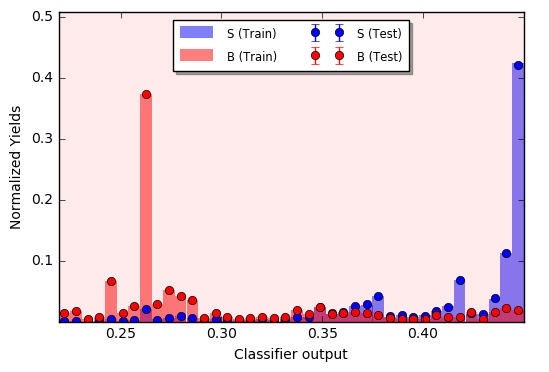

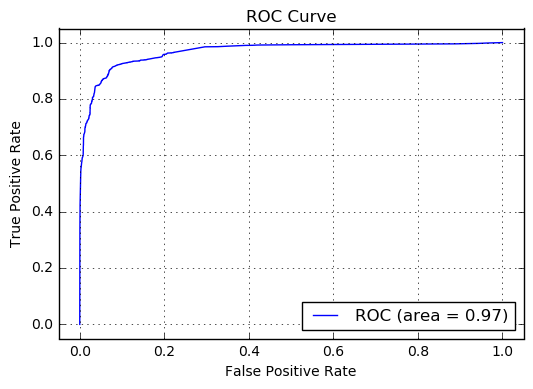

======== ROC report ========
0
True positive rate: 0.0
False positive rate:0.0
1
True positive rate: 0.05
False positive rate:0.0
2
True positive rate: 0.1
False positive rate:0.0
3
True positive rate: 0.15
False positive rate:0.0
4
True positive rate: 0.2
False positive rate:0.0
5
True positive rate: 0.25
False positive rate:0.0
6
True positive rate: 0.3
False positive rate:0.0
7
True positive rate: 0.35
False positive rate:0.000359130903214
8
True positive rate: 0.4
False positive rate:0.000718261806428
9
True positive rate: 0.45
False positive rate:0.000718261806428
10
True positive rate: 0.5
False positive rate:0.00152630633866
11
True positive rate: 0.55
False positive rate:0.0024241335967
12
True positive rate: 0.6
False positive rate:0.00808044532232
13
True positive rate: 0.65
False positive rate:0.00888848985455
14
True positive rate: 0.7
False positive rate:0.0130184952415
15
True positive rate: 0.75
False positive rate:0.024241335967
16
True positive rate: 0.8
False positive

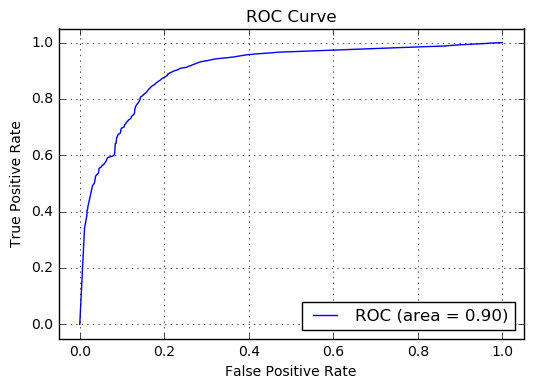

======== ROC report ========
0
True positive rate: 0.0
False positive rate:0.0
1
True positive rate: 0.05
False positive rate:0.0
2
True positive rate: 0.1
False positive rate:0.0
3
True positive rate: 0.15
False positive rate:0.0
4
True positive rate: 0.2
False positive rate:0.0
5
True positive rate: 0.25
False positive rate:0.0
6
True positive rate: 0.3
False positive rate:0.0
7
True positive rate: 0.35
False positive rate:0.0113874674723
8
True positive rate: 0.4
False positive rate:0.0167749959751
9
True positive rate: 0.45
False positive rate:0.0199285942023
10
True positive rate: 0.5
False positive rate:0.0302069884242
11
True positive rate: 0.55
False positive rate:0.0448638018063
12
True positive rate: 0.6
False positive rate:0.0807929347614
13
True positive rate: 0.65
False positive rate:0.0860320957802
14
True positive rate: 0.7
False positive rate:0.103843559641
15
True positive rate: 0.75
False positive rate:0.129317520095
16
True positive rate: 0.8
False positive rate:0.14

In [8]:
import matplotlib.pyplot as plt

utils.plotting.plot_classifier_output(clf,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_resWeight_optimized")
plt.show()
fpr,tpr = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-2,outString="xgbr_gJets_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)
fpr,tpr = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-1,outString="xgbr_diphotons_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)

In [5]:
import xgboost as xgb
clf_2 = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='binary:logistic', reg_alpha=1e-05, reg_lambda=1e-05,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

clf_2.fit(X_total_train,y_total_train, sample_weight=w_total_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=1e-05,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

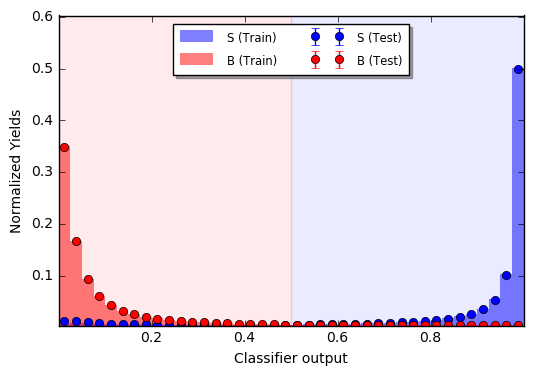

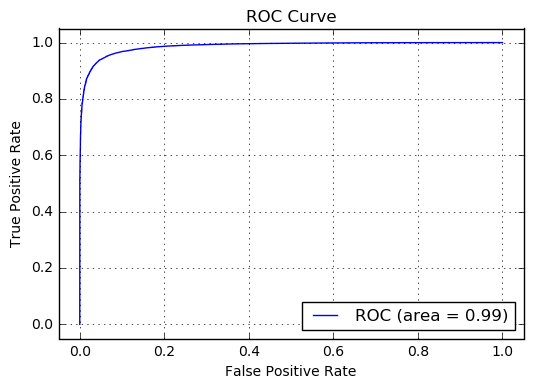

======== ROC report ========
0
True positive rate: 0.0
False positive rate:1.0
1
True positive rate: 0.05
False positive rate:3.47239394204e-05
2
True positive rate: 0.1
False positive rate:9.57538935532e-05
3
True positive rate: 0.15
False positive rate:0.000223075004761
4
True positive rate: 0.2
False positive rate:0.000399851423629
5
True positive rate: 0.25
False positive rate:0.000730254968417
6
True positive rate: 0.3
False positive rate:0.00113536759499
7
True positive rate: 0.35
False positive rate:0.00171304767807
8
True positive rate: 0.4
False positive rate:0.00254010878063
9
True positive rate: 0.45
False positive rate:0.00362075986502
10
True positive rate: 0.5
False positive rate:0.00523384468718
11
True positive rate: 0.55
False positive rate:0.0074277663142
12
True positive rate: 0.6
False positive rate:0.0107570555362
13
True positive rate: 0.65
False positive rate:0.0153763917197
14
True positive rate: 0.7
False positive rate:0.0222243734696
15
True positive rate: 0.7

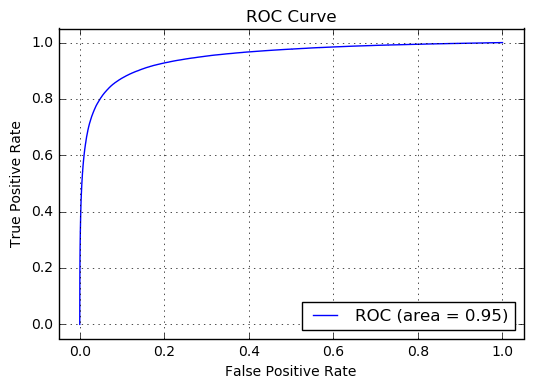

======== ROC report ========
0
True positive rate: 0.0
False positive rate:1.0
1
True positive rate: 0.05
False positive rate:3.47239394204e-05
2
True positive rate: 0.1
False positive rate:9.57538935532e-05
3
True positive rate: 0.15
False positive rate:0.000223075004761
4
True positive rate: 0.2
False positive rate:0.000399851423629
5
True positive rate: 0.25
False positive rate:0.000730254968417
6
True positive rate: 0.3
False positive rate:0.00113536759499
7
True positive rate: 0.35
False positive rate:0.00171304767807
8
True positive rate: 0.4
False positive rate:0.00254010878063
9
True positive rate: 0.45
False positive rate:0.00362075986502
10
True positive rate: 0.5
False positive rate:0.00523384468718
11
True positive rate: 0.55
False positive rate:0.0074277663142
12
True positive rate: 0.6
False positive rate:0.0107570555362
13
True positive rate: 0.65
False positive rate:0.0153763917197
14
True positive rate: 0.7
False positive rate:0.0222243734696
15
True positive rate: 0.7

In [11]:
import matplotlib.pyplot as plt

utils.plotting.plot_classifier_output(clf_2,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_resWeight_optimized")
plt.show()
fpr_gJ_2,tpr_gJ_2 = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf_2,-2,outString="xgbr_gJets_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)
fpr_dipho_2,tpr_dipho_2 = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf_2,-1,outString="xgbr_diphotons_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)

In [7]:
import xgboost as xgb
clf_3 = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='binary:logistic', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

clf_3.fit(X_total_train,y_total_train, sample_weight=w_total_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

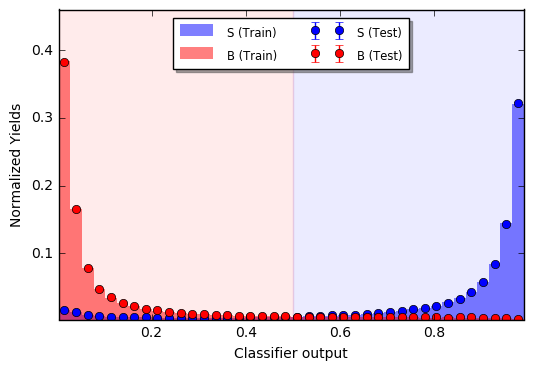

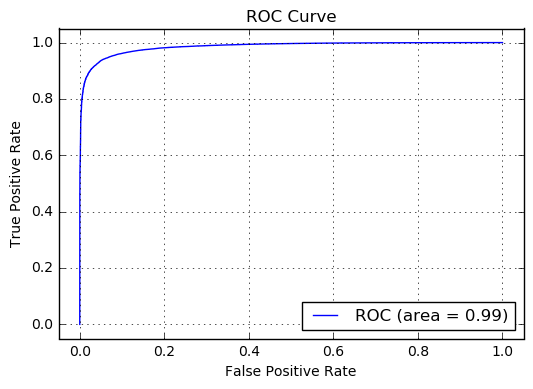

======== ROC report ========
0
True positive rate: 0.0
False positive rate:1.0
1
True positive rate: 0.05
False positive rate:3.47239394204e-05
2
True positive rate: 0.1
False positive rate:9.57538935532e-05
3
True positive rate: 0.15
False positive rate:0.000223075004761
4
True positive rate: 0.2
False positive rate:0.000399851423629
5
True positive rate: 0.25
False positive rate:0.000730254968417
6
True positive rate: 0.3
False positive rate:0.00113536759499
7
True positive rate: 0.35
False positive rate:0.00171304767807
8
True positive rate: 0.4
False positive rate:0.00254010878063
9
True positive rate: 0.45
False positive rate:0.00362075986502
10
True positive rate: 0.5
False positive rate:0.00523384468718
11
True positive rate: 0.55
False positive rate:0.0074277663142
12
True positive rate: 0.6
False positive rate:0.0107570555362
13
True positive rate: 0.65
False positive rate:0.0153763917197
14
True positive rate: 0.7
False positive rate:0.0222243734696
15
True positive rate: 0.7

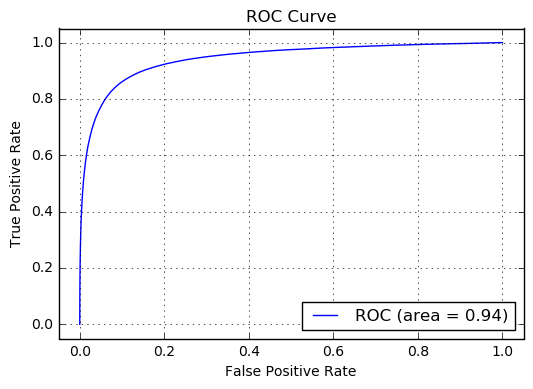

======== ROC report ========
0
True positive rate: 0.0
False positive rate:1.0
1
True positive rate: 0.05
False positive rate:3.47239394204e-05
2
True positive rate: 0.1
False positive rate:9.57538935532e-05
3
True positive rate: 0.15
False positive rate:0.000223075004761
4
True positive rate: 0.2
False positive rate:0.000399851423629
5
True positive rate: 0.25
False positive rate:0.000730254968417
6
True positive rate: 0.3
False positive rate:0.00113536759499
7
True positive rate: 0.35
False positive rate:0.00171304767807
8
True positive rate: 0.4
False positive rate:0.00254010878063
9
True positive rate: 0.45
False positive rate:0.00362075986502
10
True positive rate: 0.5
False positive rate:0.00523384468718
11
True positive rate: 0.55
False positive rate:0.0074277663142
12
True positive rate: 0.6
False positive rate:0.0107570555362
13
True positive rate: 0.65
False positive rate:0.0153763917197
14
True positive rate: 0.7
False positive rate:0.0222243734696
15
True positive rate: 0.7

In [12]:
import matplotlib.pyplot as plt

utils.plotting.plot_classifier_output(clf_3,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_resWeight_optimized")
plt.show()
fpr_gJ_3,tpr_gJ_3 = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf_3,-2,outString="xgbr_gJets_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)
fpr_dipho_3,tpr_dipho_3 = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf_3,-1,outString="xgbr_diphotons_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)

In [9]:
import xgboost as xgb
clf_4 = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='binary:logistic', reg_alpha=1e-05, reg_lambda=0.01,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

clf_4.fit(X_total_train,y_total_train, sample_weight=w_total_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=12,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=0.01,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

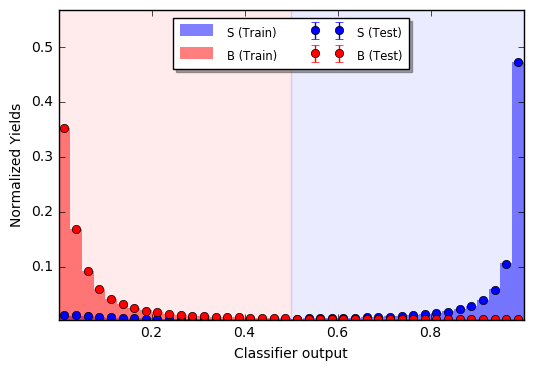

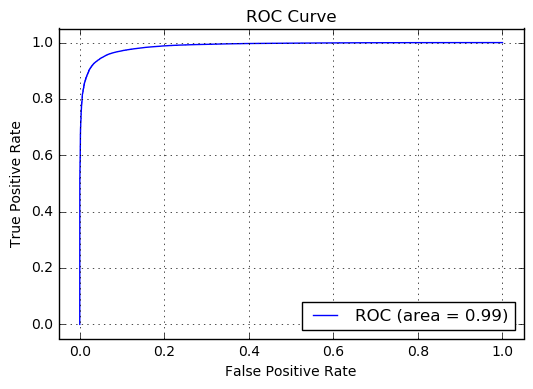

======== ROC report ========
0
True positive rate: 0.0
False positive rate:1.0
1
True positive rate: 0.05
False positive rate:3.47239394204e-05
2
True positive rate: 0.1
False positive rate:9.57538935532e-05
3
True positive rate: 0.15
False positive rate:0.000223075004761
4
True positive rate: 0.2
False positive rate:0.000399851423629
5
True positive rate: 0.25
False positive rate:0.000730254968417
6
True positive rate: 0.3
False positive rate:0.00113536759499
7
True positive rate: 0.35
False positive rate:0.00171304767807
8
True positive rate: 0.4
False positive rate:0.00254010878063
9
True positive rate: 0.45
False positive rate:0.00362075986502
10
True positive rate: 0.5
False positive rate:0.00523384468718
11
True positive rate: 0.55
False positive rate:0.0074277663142
12
True positive rate: 0.6
False positive rate:0.0107570555362
13
True positive rate: 0.65
False positive rate:0.0153763917197
14
True positive rate: 0.7
False positive rate:0.0222243734696
15
True positive rate: 0.7

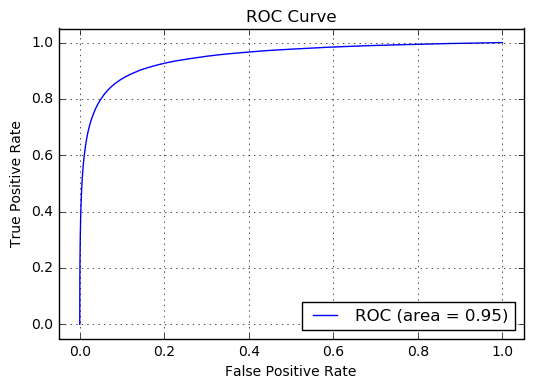

======== ROC report ========
0
True positive rate: 0.0
False positive rate:1.0
1
True positive rate: 0.05
False positive rate:3.47239394204e-05
2
True positive rate: 0.1
False positive rate:9.57538935532e-05
3
True positive rate: 0.15
False positive rate:0.000223075004761
4
True positive rate: 0.2
False positive rate:0.000399851423629
5
True positive rate: 0.25
False positive rate:0.000730254968417
6
True positive rate: 0.3
False positive rate:0.00113536759499
7
True positive rate: 0.35
False positive rate:0.00171304767807
8
True positive rate: 0.4
False positive rate:0.00254010878063
9
True positive rate: 0.45
False positive rate:0.00362075986502
10
True positive rate: 0.5
False positive rate:0.00523384468718
11
True positive rate: 0.55
False positive rate:0.0074277663142
12
True positive rate: 0.6
False positive rate:0.0107570555362
13
True positive rate: 0.65
False positive rate:0.0153763917197
14
True positive rate: 0.7
False positive rate:0.0222243734696
15
True positive rate: 0.7

In [13]:
import matplotlib.pyplot as plt

utils.plotting.plot_classifier_output(clf_4,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_resWeight_optimized")
plt.show()
fpr_gJ_4,tpr_gJ_4 = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf_4,-2,outString="xgbr_gJets_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)
fpr_dipho_4,tpr_dipho_4 = utils.plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf_4,-1,outString="xgbr_diphotons_resWeighting_optimized")
plt.show()
utils.plotting.print_roc_report(fpr,tpr,step=0.05)

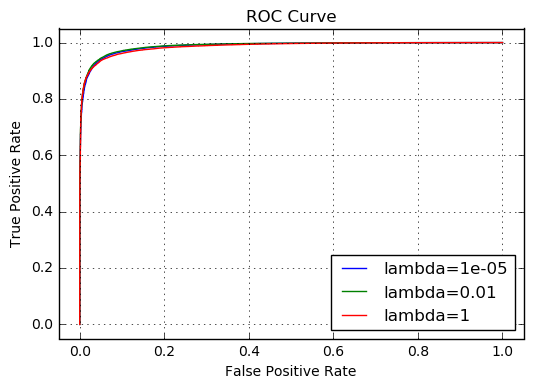

In [22]:
from sklearn.metrics import roc_curve, auc

plt.plot(fpr_gJ_2, tpr_gJ_2, lw=1, label='lambda=1e-05')

plt.plot(fpr_gJ_4, tpr_gJ_4, lw=1, label='lambda=0.01')

plt.plot(fpr_gJ_3, tpr_gJ_3, lw=1, label='lambda=1')



plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()

outString = "comparison"
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+".png")
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+".pdf")

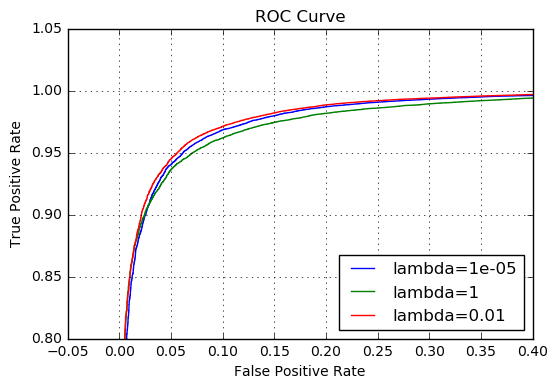

In [25]:
plt.plot(fpr_gJ_2, tpr_gJ_2, lw=1, label='lambda=1e-05')

plt.plot(fpr_gJ_3, tpr_gJ_3, lw=1, label='lambda=1')

plt.plot(fpr_gJ_4, tpr_gJ_4, lw=1, label='lambda=0.01')

plt.xlim([-0.05, 0.4])
plt.ylim([0.8, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()

outString = "comparison"
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+"_zoom.png")
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+"_zoom.pdf")

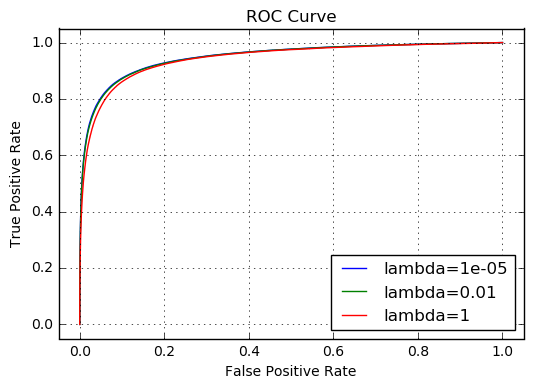

In [26]:
plt.plot(fpr_dipho_2, tpr_dipho_2, lw=1, label='lambda=1e-05')

plt.plot(fpr_dipho_4, tpr_dipho_4, lw=1, label='lambda=0.01')

roc_auc_dipho_3 = auc(fpr_dipho_3, tpr_dipho_3)
plt.plot(fpr_dipho_3, tpr_dipho_3, lw=1, label='lambda=1')



plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()

outString = "comparison_dipho"
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+".png")
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+".pdf")

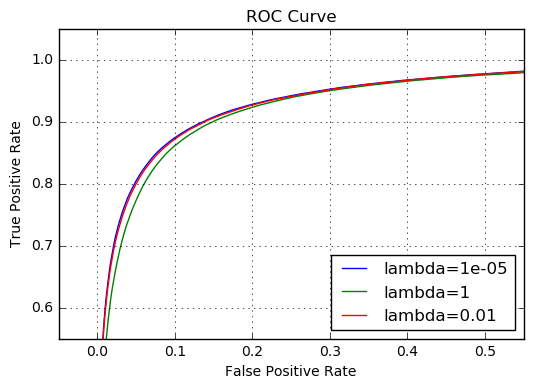

In [29]:
plt.plot(fpr_dipho_2, tpr_dipho_2, lw=1, label='lambda=1e-05')

plt.plot(fpr_dipho_3, tpr_dipho_3, lw=1, label='lambda=1')

plt.plot(fpr_dipho_4, tpr_dipho_4, lw=1, label='lambda=0.01')

plt.xlim([-0.05, 0.55])
plt.ylim([0.55, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()

outString = "comparison_dipho"
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+"_zoom.png")
plt.savefig(utils.IO.plotFolder+"rocCurve"+"_"+str(outString)+"_zoom.pdf")